# Projeto COVID-19
## DIO
Primeiro importar algumas bibliotecas necessárias para o projeto hoje.

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# vamos importar os dados para o projeto
url = "https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true" 

In [3]:
# criar o dateframe e ler os dados já informando que há dados que são datas.
#E exibimos esses dados.
df = pd.read_csv(url, parse_dates=['ObservationDate','Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [5]:
# conferir quais tipos de dados há em cada coluna
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

Nomes de colunas não devem ter letras maiúsculas ou caracteres especiais.
Vamos implementar uma função para fazer uma limpeza dos nomes das colunas.

In [6]:
#criando função que corrige nomes das colunas, retirando espaçoes e caracteres especiais.
import re # importando biblioteca react express
def corrige_colunas(col_name):
    return re.sub(r"[/| ]","",col_name).lower()

In [7]:
# testando função
corrige_colunas("A@|bcdas MIMO")

'a@bcdasmimo'

In [8]:
#agora realizar a correção no nomes das colunas do dateframe.
# E exibir o dateframe corrigido.
df.columns = [corrige_colunas(col) for col in df.columns]
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


# Dados do Brasil
serão separados os dados do Brasil, com os quais iremos trabalhar.


In [9]:
#Exibir quais países existem no dado.
df.countryregion.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [39]:
#extração dos dados no Brasil.
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [45]:
#criando uma variavel que vai armazenar os dados do Brasil extraimos os dados
#onde tivemos pelo meno um caso confirmado.
brazil = df.loc[
    (df.countryregion == "Brazil") &
    (df.confirmed > 0)
]

In [46]:
#exibindo os dados da nova variavel.
brazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Casos Confirmados

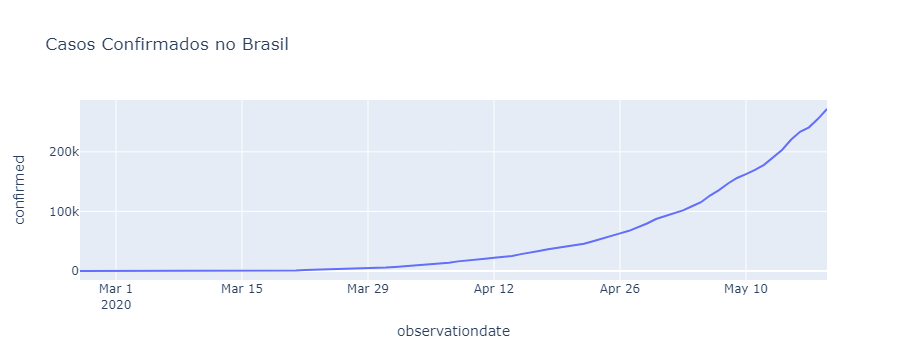

In [47]:
# Gráfico da evolução dos casos confirmados
px.line(brazil,'observationdate','confirmed', title = "Casos Confirmados no Brasil")

# Novos Casos

In [66]:
# criar nova coluna "novoscasos" e criar uma função que gera os dados da coluna criada.
brazil["novoscasos"] = list(map(
    lambda x : 0 if (x==0) else brazil['confirmed'].iloc[x] - brazil['confirmed'].iloc[x-1],
    np.arange(brazil.shape[0])
))

C:\Users\Cleiton Montino\AppData\Local\Temp\ipykernel_11944\899313612.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
brazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


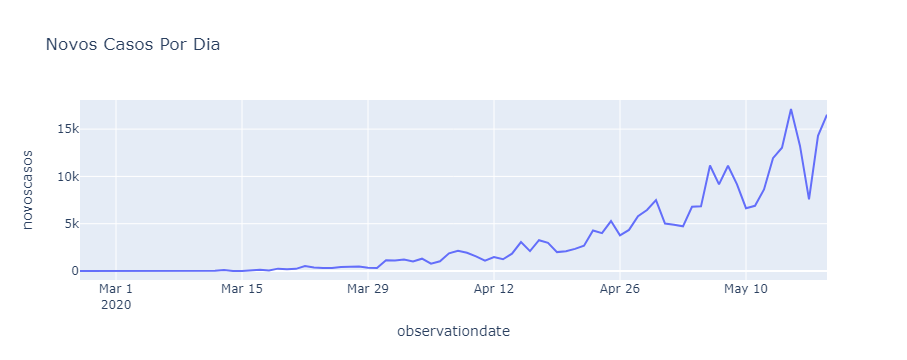

In [68]:
#plotando os dados da coluna novoscasos em um gráfico
px.line(brazil,x='observationdate',y='novoscasos',title ='Novos Casos Por Dia')

# Mortes

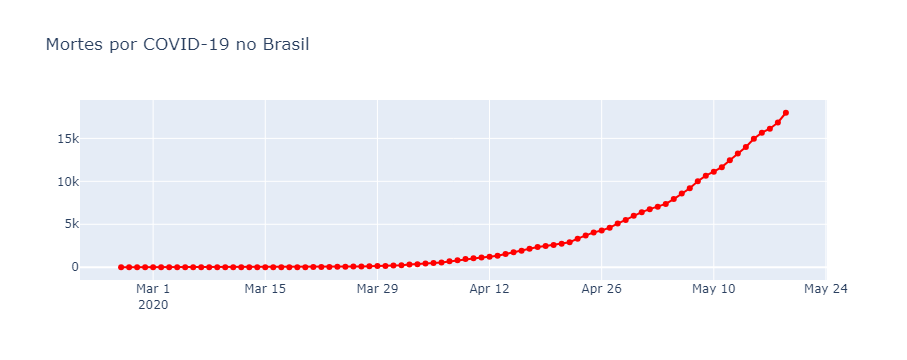

In [71]:
#plotar num gráfico os dados de mortes no Brasil por COVID-19.
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=brazil.observationdate, y=brazil.deaths, name= "Mortes",
            mode='lines+markers',line={'color':'red'})
)
#Layout
fig.update_layout(title='Mortes por COVID-19 no Brasil')

fig.show()

# Taxa de Crescimento
taxa de crescimento = (presente/passado)**(1/n) -1

In [85]:
#criar função que calcula a taxa de crescimento 
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    #Se a data for None, define como a primeira data disponivel.
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] >0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
        
    else:
        data_fim = pd.to_datetime(data_fim)
        
    #Definir os valores  do presente e passado
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    # Define o número  de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    #Calcular a taxa
    taxa = (presente/passado)**(1/n) - 1
    
    return taxa*100
    

In [86]:
#Taxa de crescimento médio do COVID-19 no Brasil em todo o periodo do dado.
taxa_crescimento(brazil,'confirmed')

16.27183353112116

In [87]:
#Taxa de crescimento diaria 
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    #Se a data for None, define como a primeira data disponivel.
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] >0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.observationdate.max()
    # Define o número  de pontos no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    # Taxa calculada de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1)    
    ))
    return np.array(taxas) * 100

In [88]:
tx_dia = taxa_crescimento_diaria(brazil, 'confirmed')

In [89]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

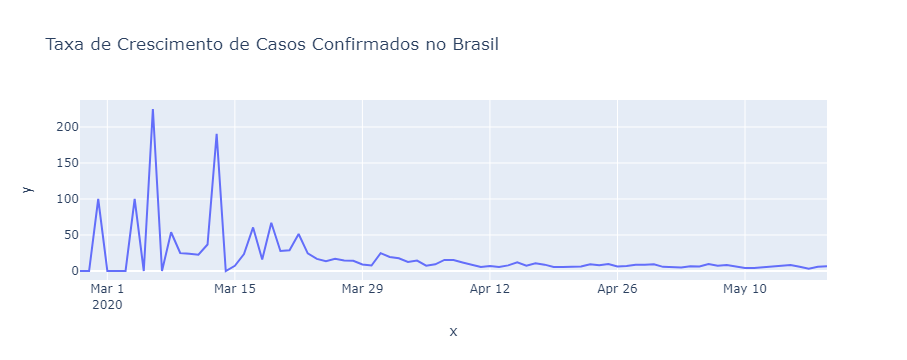

In [90]:
primeiro_dia = brazil.observationdate.loc[brazil.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, brazil.observationdate.max())[1:],
       y=tx_dia, title= 'Taxa de Crescimento de Casos Confirmados no Brasil')

# Predições

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [92]:
confirmados = brazil.confirmed
confirmados.index = brazil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [93]:
res = seasonal_decompose(confirmados)

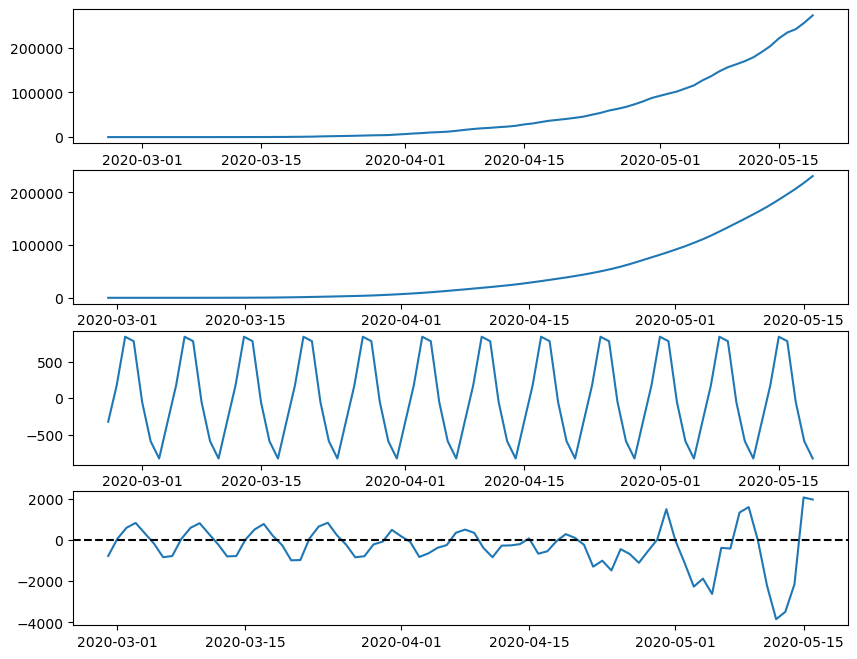

In [96]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0,linestyle='dashed',c='black')
plt.show()

# ARIMA

In [98]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/30/ca/d68432adc1bf90b450c4d9aaf7cbadae50bca0cad1686b1976498abe2eca/Cython-3.0.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/614.7 kB 653.6 kB/s eta 0:00:01
   ------------ --------------------------- 194.6/614.7 kB 1.2 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/614.7 kB 1.5 MB/s eta 0:00:01
   ------------------------------- -------- 491.5/614.7 kB 2.1 MB/s eta 0:00:01
   ------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [99]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

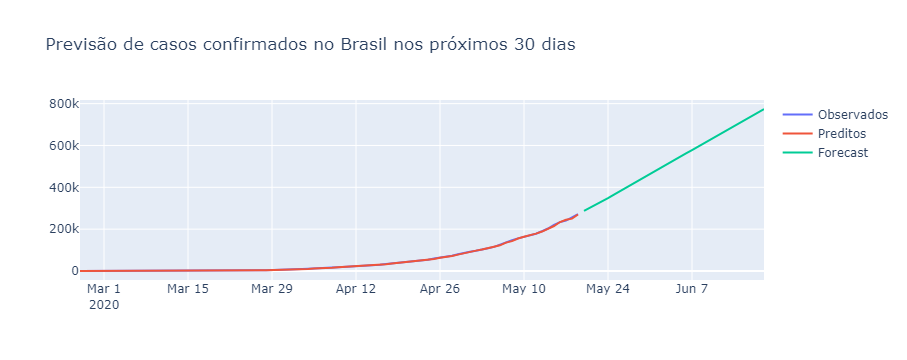

In [102]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(),  name ='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20','2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil nos próximos 30 dias')
fig.show()

# Modelo de crescimento
Vamos usar  biblioteca fbprophet

In [ ]:
#vamos instalar a biblioteca
!conda install -c conda-forge fbprophet -y

In [ ]:
#Preprocessamento
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

#Renomeando colunas
train.rename(columns={'observationdate':'ds','confirmed':'y'}, inplace=True)
test.rename(columns={'observationdate':'ds','confirmed':'y'}, inplace=True)

#DEfinir o modelo de crescimento
profeta = Prophet(growth='logistic',changepoints=['2020-03-21','2020-03-30','2020-04-25','2020-05-03','2020-05-10'])

pop =2111463256
#pop = 1000000
train['cap'] = pop

#treina o modelo
profeta.fit(train)

#Construir previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds,y=forecast.yhat,name='Predição'))
#fig.add_trace(go.Scatter(x=test.index,y=test,name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds,y=train.y,name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()